In [1]:
#import the libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Bank Data analysis and exploration**

In [2]:
#Read the data set

bank_df=pd.read_csv("C:/Users/Saurav Anand/OneDrive/Documents/Data Sets/bank-full.csv")

In [3]:
#Display the datset

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Shape of the data

bank_df.shape

(45211, 17)

In [5]:
#Type of the data set

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Here we have 10 columns which are categorical(including target column as it is a classification problem ) and 7 columns which are numeric  type 

In [6]:
#Checking for the missing values 

bank_df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

We don't have any null values in the given data set 

In [7]:
#Calculate the five point summary for the numeric columns 

bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
#No of distinct observations 

bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

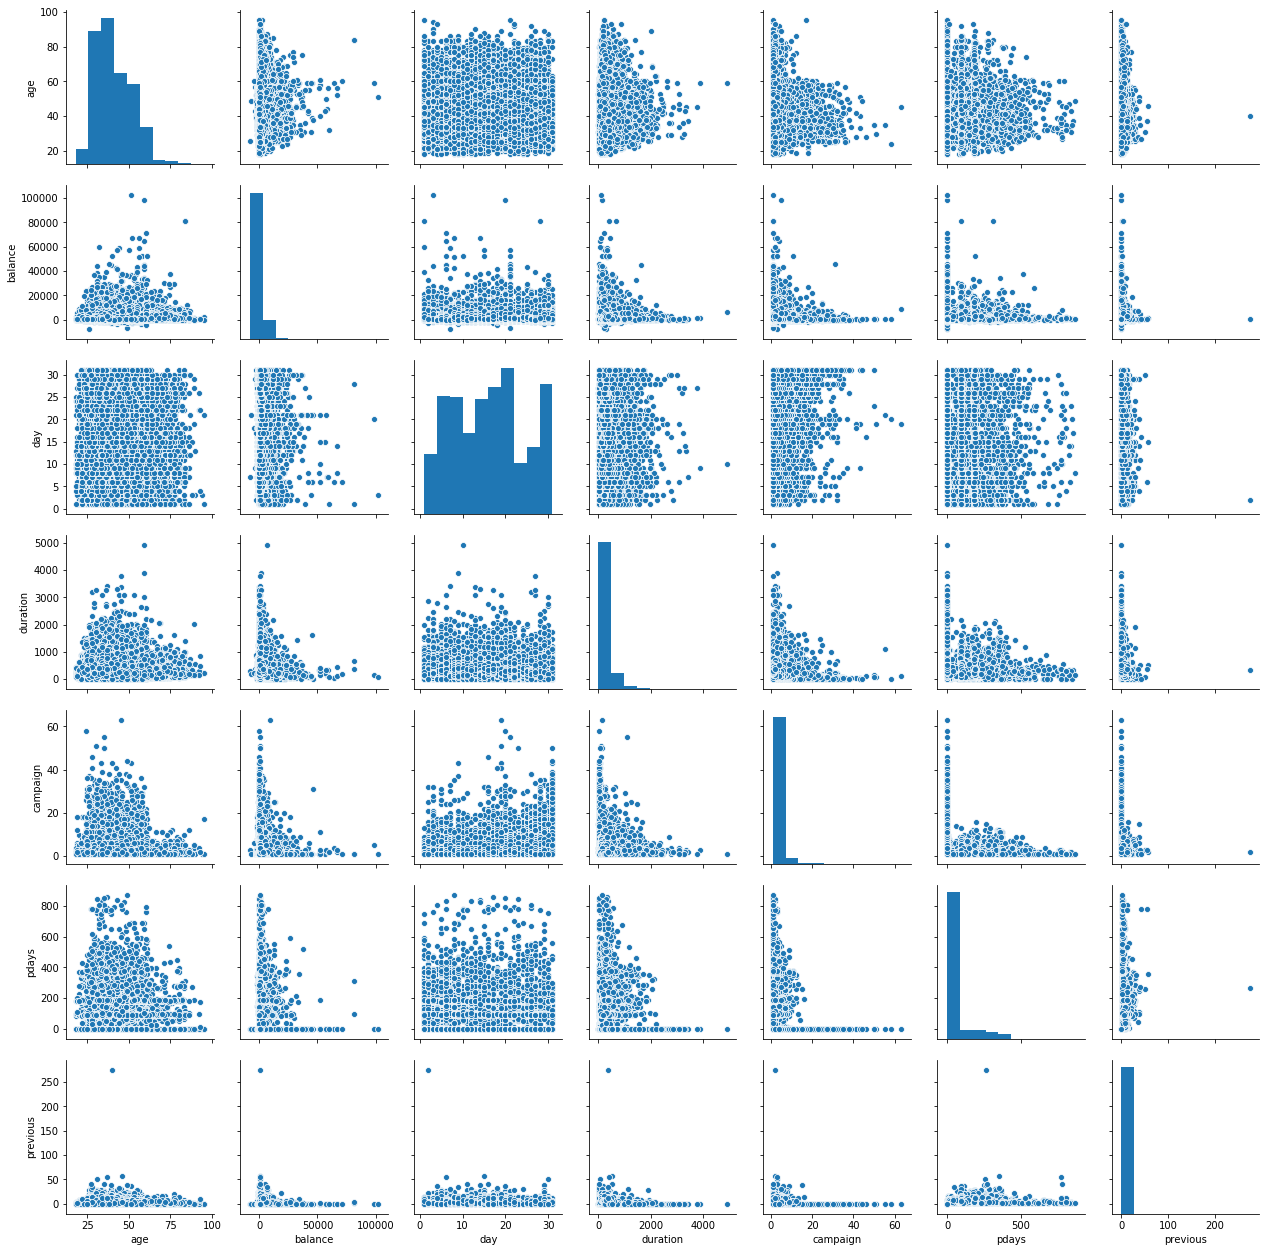

In [9]:
#Drawing a pair plot to understand the data

sns.pairplot(bank_df.iloc[:,0:17])

### **Observations from the above pairplot** 

1. Age :- Most of the people have age range between 30-40. There's slight difference between mean and median.
2. Balance:- There are many people with negative balance ranging between (-700 to 0)
3. Duration:- The duration ranges from 0 to 500. Also the mean>median which suggests it is positively skewed.
4. Compaign:- Most of the people have been contacted 0 to 4 times.There are oultiers. 
5. pdays:- There are lot of negative values in this section.There are outliers 
6. previous:- Most of the people have been contacted for the first time for this compaign. No contacts where performed in majority cases before this compaign.There are outliers.

**We can observe that data here is not-symmetric.**


**1.1 Understanding the categorical Values** 

In [10]:
#Understanding the categorical values 

print("Job:\n" ,bank_df["job"].unique())
print("marital\n",bank_df["marital"].unique())
print("education\n",bank_df["education"].unique())
print("default\n",bank_df["default"].unique())
print("housing\n",bank_df["housing"].unique())
print("loan\n",bank_df["loan"].unique())
print("contact\n",bank_df["contact"].unique())
print("month\n",bank_df["month"].unique())
print("poutcome\n",bank_df["poutcome"].unique())
print("Target\n",bank_df["Target"].unique())

Job:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
 ['married' 'single' 'divorced']
education
 ['tertiary' 'secondary' 'unknown' 'primary']
default
 ['no' 'yes']
housing
 ['yes' 'no']
loan
 ['no' 'yes']
contact
 ['unknown' 'cellular' 'telephone']
month
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
 ['unknown' 'failure' 'other' 'success']
Target
 ['no' 'yes']


In [11]:
#Counting the no of unknown in the Job column
#Counting the no of unknown in the education column
#Counting the no of unknown in the poutcome column
#Counting the no of negative values in the pdays column

print(bank_df[bank_df["job"]=="unknown"]["job"].count())
print(bank_df[bank_df["education"]=="unknown"]["education"].count())
print(bank_df[bank_df["poutcome"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["pdays"]< 0]["pdays"].count())


288
1857
36959
36954


In [12]:
#Value count of the Job 
bank_df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
#value count of the education
bank_df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
#Value count of the poutcome
bank_df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

**1.2 Age**

C:\Users\Saurav Anand\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


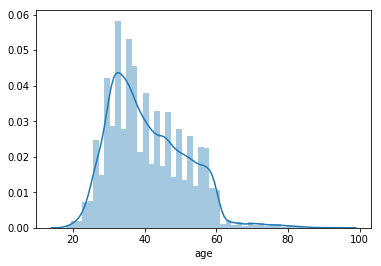

In [15]:
sns.distplot(bank_df["age"])

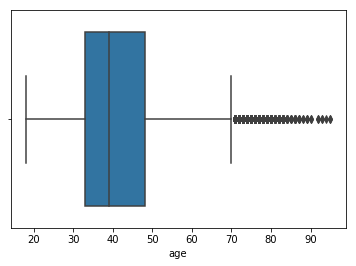

In [16]:
sns.boxplot(bank_df["age"])

In the age columns, we have following data from the above five point summary chart about the age 

Minm=18
Q1,1st quartile =33.0	
Q2,2nd quartile =39.0
Q3,3rd quartile= 48.0
Maxm=95

From the above boxplot , it's clear that the values above 69 can be considered as an outlier . But we will try to calculate it 

Interquartile range  IQR = Q3 - Q1=15
#Formula to calculate outliers 
High = (Q3) + 1.5 IQR
Low = (Q1) – 1.5 IQR




In [17]:
# Calculating the outliers using the formula 

print('Ages below: ', bank_df['age'].quantile(q = 0.25) -
                      1.5*(bank_df['age'].quantile(q = 0.75) - bank_df['age'].quantile(q = 0.25)), 'are outliers')

print('Ages above: ', bank_df['age'].quantile(q = 0.75) + 
                      1.5*(bank_df['age'].quantile(q = 0.75) - bank_df['age'].quantile(q = 0.25)), 'are outliers')

Ages below:  10.5 are outliers
Ages above:  70.5 are outliers


In [18]:
#Count of no of outliers in the datset

print('No of outliers:',bank_df[bank_df['age'] < 10.5]['age'].count())
print('No of outliers:',bank_df[bank_df['age'] > 70.5]['age'].count())

No of outliers: 0
No of outliers: 487


In [19]:
#Calculate the percentage of the outlier in the dataset

print('Percentage of Outliers are:', round(bank_df[bank_df['age'] > 70.5]['age'].count()*100/len(bank_df),2), '%')

Percentage of Outliers are: 1.08 %


In [20]:
#Calculate the coefficient of dispersion for age to get an insight of the disperson
# Coefficient of Variation = (Standard Deviation / Mean) * 100.
#If coeff < 15%, low dispersion
#If Coeff > 30% , high disperson

print("Coeff of dispersion is:", round(bank_df['age'].std()*100/bank_df['age'].mean(), 1))



Coeff of dispersion is: 25.9


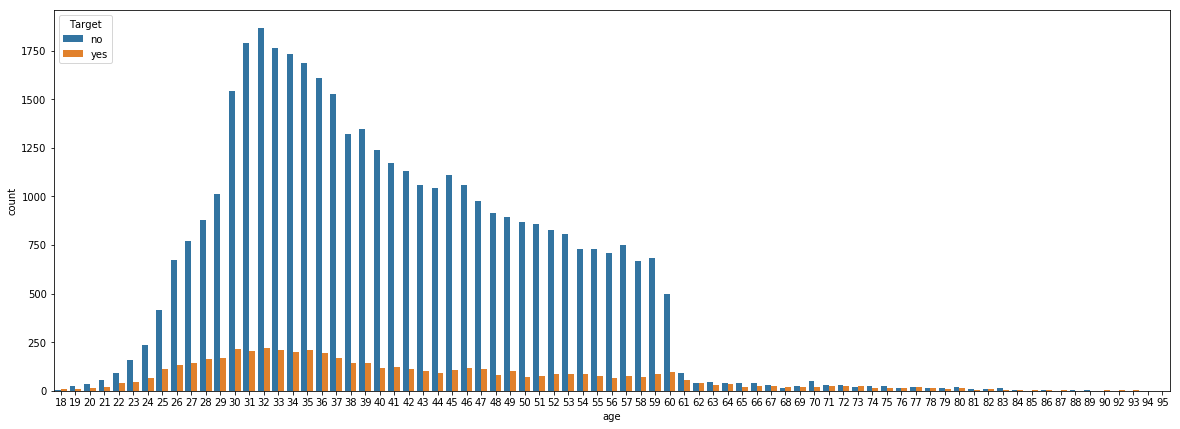

In [21]:

plt.figure(figsize=(20,7)) # this creates a figure 20 inch wide, 7 inch high
sns.countplot(x="age",data=bank_df,hue="Target")
plt.show()

**Observation**

1. Age has somewhat high dispersion which means that there are people with different ages are the client of the bank.
2. The percentage of the outliers are very less so we can ignore or fit the model with or withour them. 
3. There is no definite relation between the age and the target column. All we can say most of them are not interested in the term deposit

    
    

**1.3 Job** 

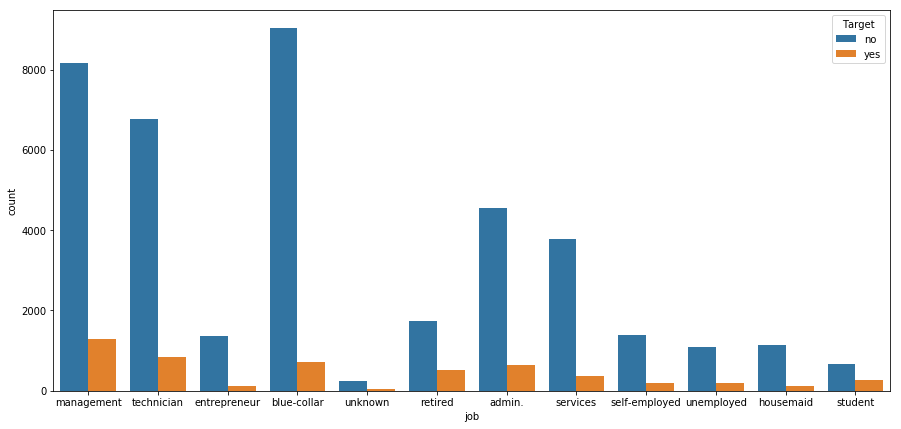

In [22]:
#Kind of job the clients of the bank have 
plt.figure(figsize=(15,7))
sns.countplot(x="job",data=bank_df, hue="Target")

In [23]:
#Since the no of unknown in the Job column is very less , we can drop the values

# Get names of indexes for which column Age has value 30
indexNames = bank_df[ bank_df['job'] == "unknown" ].index
# Delete these row indexes from dataFrame
bank_df.drop(indexNames , inplace=True)

In [24]:
#Confirming the unknow values are dropped
print("Job:\n" ,bank_df["job"].unique())


Job:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']


**Observation**

1. There are more clients who work in management , blue-collar jobs and as a technician.
2. Majority of clients irrespective of their profession have more likely not subscribed to the term deposit.



**1.4 Marital**

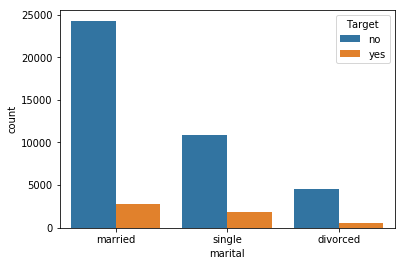

In [25]:
sns.countplot(x="marital",data=bank_df, hue="Target")

**Observation**

1. There are more no of clients who are married
2. There's no definite pattern which can derived wrt target variable.Majority of the clients irrespective of their marital status have not taken the term deposit.

**1.4 Education**

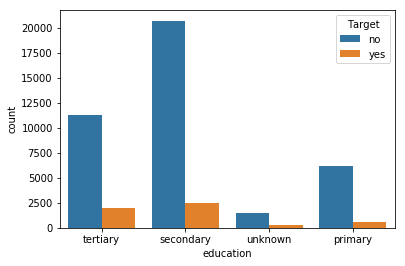

In [26]:
sns.countplot(x="education",data=bank_df, hue="Target")

**Observation**

1. There are more clients with the secondary education.
2. Education has no impact on the target as most of the people are interested in term deposit irrespective of their educational qualification

**1.5 Credit in default**

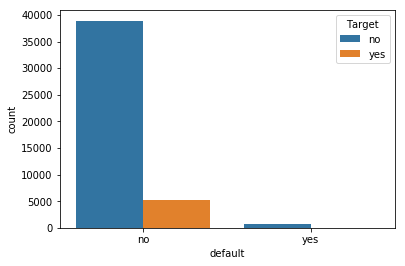

In [27]:
sns.countplot(x="default",data=bank_df, hue="Target")

**Observation**

1. There are more clients with the no default credit amount.
2. All the clients with no or yes default credit amount have not subscribed to the term deposit.

**1.6 Balance** 

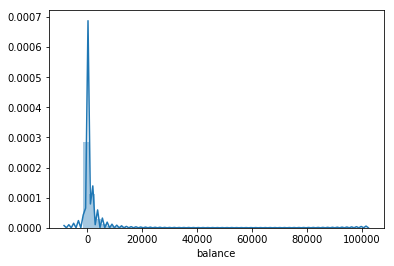

In [28]:
sns.distplot(bank_df["balance"])

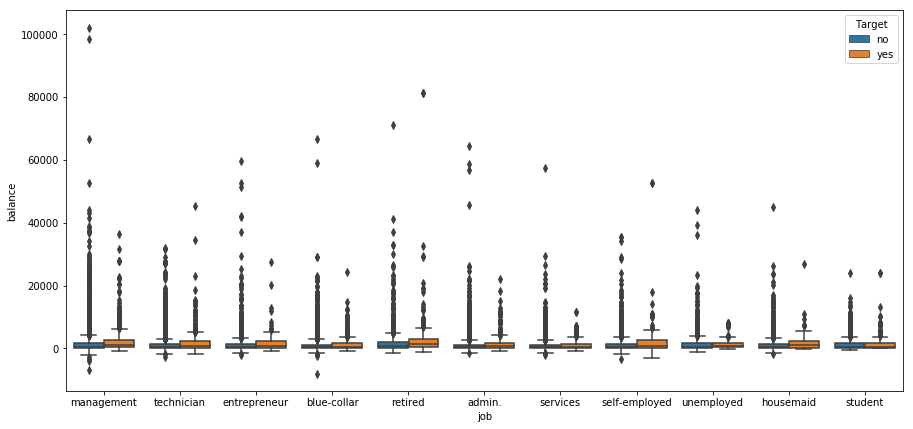

In [29]:
#Influence of job and balance on the Target variable
plt.figure(figsize=(15,7))
sns.boxplot(x='job',y='balance',hue='Target',data=bank_df)

In [30]:
# Calculating the outliers using the formula 

print('Balance below: ', bank_df['balance'].quantile(q = 0.25) -
                      1.5*(bank_df['balance'].quantile(q = 0.75) - bank_df['balance'].quantile(q = 0.25)), 'are outliers')

print('Balance above: ', bank_df['balance'].quantile(q = 0.75) + 
                      1.5*(bank_df['balance'].quantile(q = 0.75) - bank_df['balance'].quantile(q = 0.25)), 'are outliers')

Balance below:  -1951.5 are outliers
Balance above:  3444.5 are outliers


In [31]:
#Count of no of outliers in the datset

print('No of outliers:',bank_df[bank_df['balance'] < -1962]['balance'].count())
print('No of outliers:',bank_df[bank_df['balance'] > 3462]['balance'].count())

No of outliers: 17
No of outliers: 4673


In [32]:
print('Percentage of Outliers are:', round(bank_df[bank_df['balance'] > 3462]['balance'].count()*100/len(bank_df),2), '%')

Percentage of Outliers are: 10.4 %


In [33]:
#No of negative credit balance clients and it's percentage

neg_values=bank_df[bank_df["balance"]< 0]["balance"].count()
print(neg_values)
total =len(bank_df)
neg_values_percentage=(neg_values/total)*100
print(neg_values_percentage)

3762
8.374329408098301


**Observation**

1. We have around 8.3 % of the clients with negative balance.
2. Most of them have balance  between -500 to 1000
3. The people with high balance are around 10.42 % which can be considered as an potential client to sell term deposit.
4. The management and retired clients  

**1.7 Housing**

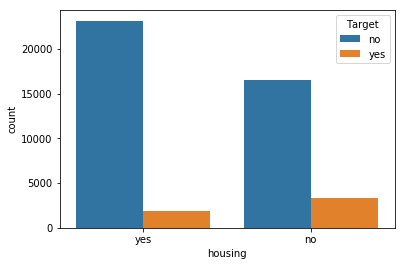

In [34]:
sns.countplot(x="housing",data=bank_df, hue="Target")

**Observation**

1. The percentage of clients with no housing have shown more interest in the term deposit as compared to clients with housing .
2. The total no of clients with no term deposit are more irrespective of the housing.

**1.8 Loan**

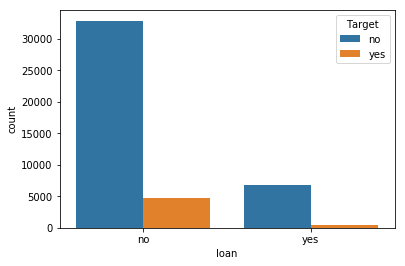

In [35]:
sns.countplot(x="loan",data=bank_df, hue="Target")

**Observation**

1. The percentage of clients with no loan have shown more interest in the term deposit as compared with clients with loan.
2. The total no of clients with no term deposit are more irrespective of the loan.

**1.9 Contact** 

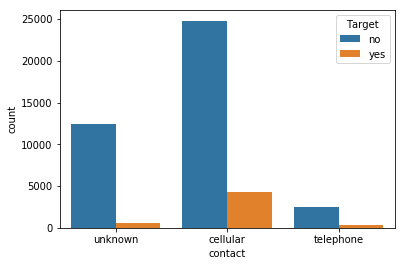

In [36]:
sns.countplot(x="contact",data=bank_df, hue="Target")

**Observation**

1. The percentage of the clients contacted via cellular is more than others.
2. 4 % of data contains unknown values .

**1.10. Month**

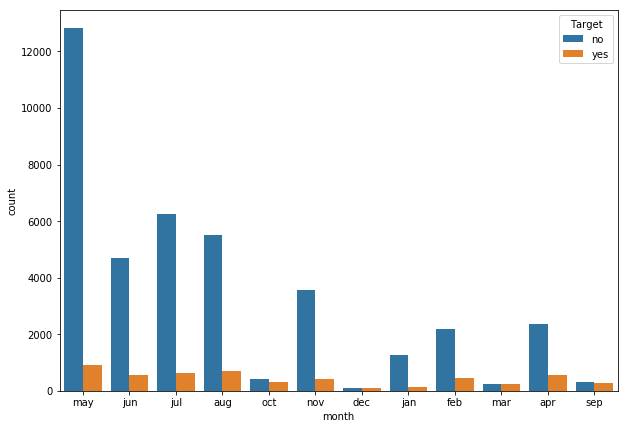

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(x="month",data=bank_df, hue="Target")

**Observation**

1. Most of the clients were last contacted in the month of the May.
2. Contact month has nothing to do with the target as most of them are not interested in term deposit.

**1.11 Duration** 

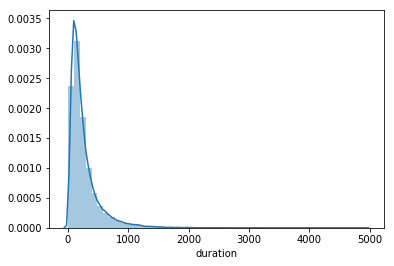

In [38]:
sns.distplot(bank_df["duration"])

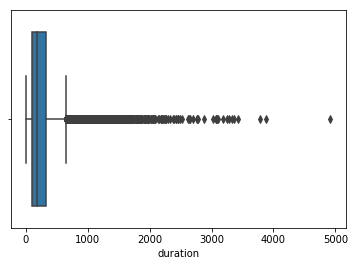

In [39]:
sns.boxplot(bank_df["duration"])

In the duration columns, we have following data from the above five point summary chart about the duration

Minm=0 Q1,1st quartile =103
Q2,2nd quartile =180 Q3,3rd quartile= 319.0 Maxm=4918

From the above boxplot , it's clear that the values above 69 can be considered as an outlier . But we will try to calculate it

Interquartile range IQR = Q3 - Q1=319-103=216

Formula to calculate outliers High = (Q3) + 1.5 IQR Low = (Q1) – 1.5 IQR




In [40]:
print('Duration calls above: ', bank_df['duration'].quantile(q = 0.75) + 
                      1.5*(bank_df['duration'].quantile(q = 0.75) - bank_df['duration'].quantile(q = 0.25)), 'are outliers')

Duration calls above:  643.0 are outliers


In [41]:
#Calculating the no of outliers 

print('Numerber of outliers: ', bank_df[bank_df['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_df))
#Outliers in %
print('Outliers are:', round(bank_df[bank_df['duration'] > 644.5]['duration'].count()*100/len(bank_df),2), '%')

Numerber of outliers:  3204
Number of clients:  44923
Outliers are: 7.13 %


In [42]:
#If the call duration is between 0 to 7 seconds then the person has not subscribed to the term deposit

bank_df[bank_df["duration"]==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [43]:
print("Coeff of dispersion is:", round(bank_df['duration'].std()*100/bank_df['duration'].mean(), 1))

Coeff of dispersion is: 99.8


**1.12 Compaign** 

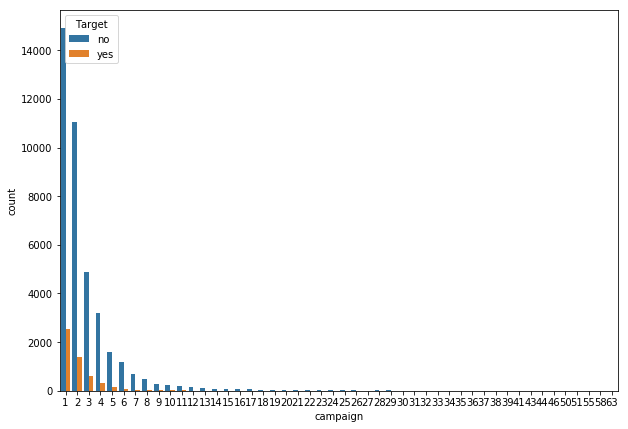

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(x="campaign",data=bank_df, hue="Target")

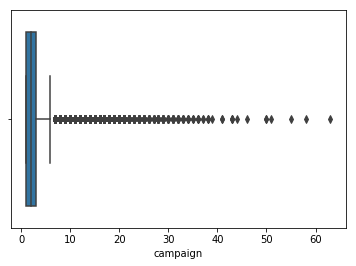

In [45]:
sns.boxplot(bank_df["campaign"])

**Observations** 

1. Most of the people have been contacted 0 to 4 times during this compaign.
2. There are few ouliers but they can be ignored .

**1.13 Pdays** 

In [46]:
#Calculating  the percentage of  negative values in the pdays column
neg_pdays= bank_df[bank_df["pdays"]< 0]["pdays"].count()
total=len(bank_df)
percent_neg_pdays=(neg_pdays*100)/total
print(percent_neg_pdays)

81.69311933753312


**Observation**

82 % of P days value are negative 

**1.14 Previous**

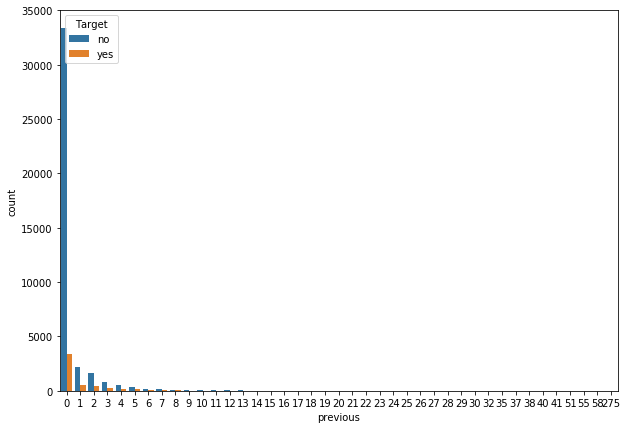

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(x="previous",data=bank_df, hue="Target")

**Observation**

Most of the client were not contacted during the previous compaign

**1.15 Poutcome**

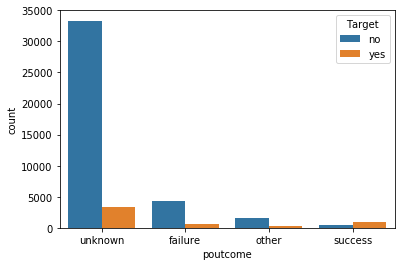

In [48]:
sns.countplot(x="poutcome",data=bank_df, hue="Target")

**Observation**

1. 82% of the data we don't know the outcome of the previous compaign
2. If the outcome of the previous compaign was successfull , then the percentage of it's success is more in current compaign.

**2.Handling the categorical data**

In [49]:
#Creating the dummy columns for job, marital,education,default, housing and loan
bank_df = pd.get_dummies(data = bank_df, columns = ['job'] , prefix = ['job'] , drop_first = True)

bank_df = pd.get_dummies(data = bank_df, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

bank_df = pd.get_dummies(data = bank_df, columns = ['education'], prefix = ['education'], drop_first = True)

bank_df = pd.get_dummies(data = bank_df, columns = ['default'] , prefix = ['default'] , drop_first = True)

bank_df = pd.get_dummies(data = bank_df, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

bank_df = pd.get_dummies(data = bank_df, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [50]:
bank_df.columns

Index(['age', 'balance', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'Target', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

In [51]:
#Creating the dummy columns for contact and month
bank_df = pd.get_dummies(data = bank_df, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

bank_df= pd.get_dummies(data = bank_df, prefix = ['month'] , columns = ['month'] , drop_first = True)

bank_df=pd.get_dummies(data = bank_df, prefix = ['poutcome'] , columns = ['poutcome'] , drop_first = True)



In [52]:
bank_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

**3.Splitting  the data into training  and test set** 

In [53]:
X=pd.DataFrame(columns=['age','balance','day','duration','campaign','pdays','previous','poutcome_other','poutcome_success','poutcome_unknown','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','marital_married','marital_single','education_secondary','education_tertiary','education_unknown','default_yes','housing_yes','loan_yes','contact_telephone','contact_unknown','month_aug','month_dec','month_feb','month_jan','month_jul','month_jun','month_mar','month_may','month_nov','month_oct','month_sep'],data=bank_df)
y=pd.DataFrame(columns=['Target'],data=bank_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)



**4.Feature Scaling** 

In [54]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**5.Classification Model Selection**

**5.1 Logistic Regression**

In [55]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

C:\Users\Saurav Anand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
#Confusion matrix for logistic regression**

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



[[11586   319]
 [ 1010   562]]
Accuracy: 0.9013875491578245


**5.2 KNN**

In [57]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))


[[11712   193]
 [ 1216   356]]
Accuracy: 0.8954515099799659


**5.3 SVC**

In [58]:
#SVC
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))

[[11032   873]
 [  947   625]]
Accuracy: 0.8649551087037174


**5.4 Naive Bayes**

In [59]:
#Naive bayes

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, gaussiannbpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, gaussiannbpred))

[[10894  1011]
 [  827   745]]
Accuracy: 0.8636194998886992


**5.5 Decision Tree**

In [60]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[11010   895]
 [  856   716]]
Accuracy: 0.8700749424946205


**5.6 Ada Boosting**

In [79]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=60)
abcl=abcl.fit(X_train,np.ravel(y_train,order='C'))
abcl_pred=abcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))

[[10988   917]
 [  843   729]]
Accuracy: 0.8694071380871113


**5.7 Random Forest**

In [62]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))


[[11581   324]
 [  939   633]]
Accuracy: 0.9062847814795577


**5.8 Bagging Classifier**

In [63]:
new_bank_df=bank_df.pop("Target")

In [64]:
#Bagging classfier

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=60, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(bank_df, new_bank_df)
print(bgcl.oob_score_)              



0.9042138770785566


**5.9 Gradient Boosting**

In [81]:
#Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

[[11545   360]
 [  915   657]]
Accuracy: 0.9053943756028789


**5.10 XGBooosting**

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, np.ravel(y_train,order='C'))
xgbprd = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))

[[11589   316]
 [  976   596]]
Accuracy: 0.9041329672775841


**6. Model Comparison**

In [68]:
from sklearn.metrics import classification_report

print('Logistic  Reports\n',classification_report(y_test, y_pred))
print('KNN Reports\n',classification_report(y_test, knnpred))
print('SVC Reports\n',classification_report(y_test, svcpred))
print('Naive BayesReports\n',classification_report(y_test, gaussiannbpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Ada Boosting\n',classification_report(y_test, abcl_pred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))
print('Bagging Clasifier',bgcl.oob_score_) 
print('Gradient Boosting',classification_report(y_test, test_pred))
print('XGBoosting\n',classification_report(y_test, xgbprd))

Logistic  Reports
               precision    recall  f1-score   support

          no       0.92      0.97      0.95     11905
         yes       0.64      0.36      0.46      1572

    accuracy                           0.90     13477
   macro avg       0.78      0.67      0.70     13477
weighted avg       0.89      0.90      0.89     13477

KNN Reports
               precision    recall  f1-score   support

          no       0.91      0.98      0.94     11905
         yes       0.65      0.23      0.34      1572

    accuracy                           0.90     13477
   macro avg       0.78      0.61      0.64     13477
weighted avg       0.88      0.90      0.87     13477

SVC Reports
               precision    recall  f1-score   support

          no       0.92      0.93      0.92     11905
         yes       0.42      0.40      0.41      1572

    accuracy                           0.86     13477
   macro avg       0.67      0.66      0.67     13477
weighted avg       0.86      

**7. Analyzing the results** 

Looking at the confusion matrix which we got from all the models, there are two types of wrong values :-

False Positive:- It means that the client do not subscribed to the term deposit , but the model thinks he did.
False Negative :- It means that the client subscribed to the term deposit , but the model said he don't.

The False positive data is more dangerous as we will interpret wrong notion about the client but in reality he is not our client.

The False negative data observations are not good but it can be ok , we have that client and in the future we'll discovery that in truth he's already our client.

So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible. 



**8.Recall Specificity** 

Recall answers the question “When it is actually the positive result, how often does it predict correctly?”. But our objective is to find out for all negative( 0 ) values how much did we predict correct?

Recall - Specificity

TN / (TN + FP) (first row of the matrix )
 



In [88]:
#Calculate the recall-specificity for all the algorithms

recall_logit=round(11586 /(11586 + 319),2)
print("Recall specificity for logistic regression :", recall_logit)
recall_Knn=round(11712/(11712 +193),2)
print("Recall specificity for KNN :", recall_Knn)
recall_SVC=round(11032/(11032+873),2)
print("Recall specificity for SVC :", recall_SVC)
recall_NB=round(10894/(10894+1011),2)
print("Recall specificity for Naive Bayes:",recall_NB)
recall_DT=round(11010/(11010+895),2)
print("Recall specificity for Decision Tree:",recall_DT)
recall_AB=round(11012/(11012+893),2)
print("Recall specificity for AdaBoosting:",recall_AB)
recall_RF=round(11581/(11581+324),2)
print("Recall specificity for random forest:",recall_RF)
recall_GB=round(11545/(11545+360),2)
print("Recall specificity for Gradient Boost:",recall_GB)
recall_XGBoost=round(11589/(11589+316),2)
print("Recall specificity for XG Boost:",recall_XGBoost)

Recall specificity for logistic regression : 0.97
Recall specificity for KNN : 0.98
Recall specificity for SVC : 0.93
Recall specificity for Naive Bayes: 0.92
Recall specificity for Decision Tree: 0.92
Recall specificity for AdaBoosting: 0.92
Recall specificity for random forest: 0.97
Recall specificity for Gradient Boost: 0.97
Recall specificity for XG Boost: 0.97


**So the conclusion is KNN  gave 98 % accurate which means  11712 client that didn't subscribed to the term deposit and 193 incorrect results**

**Calculating metrics for choosen model (KNN)**

**9.Recall** 

TP/ (TP + FN) (first row of the matrix)

In [91]:
#Recall
print(round(356 / (1216 + 356  ),2))

0.23


**10.Precision**

It mainly states us “When it predicts the positive result, how often is it correct?”

TP/ (TP + FP) (second column of the matrix)

In [92]:
#Precision

print(round(356/(193+356),2))

0.65


**11.F1-score** 
 
This is just the harmonic mean of precision and recall.It is a "median" of Recall and Precision, consider this when you want a balance between this metrics

F1 = 2(Precision(0) Recall(0)) / (Precision(0) + Recall(0))

In [100]:
#F1-Score

F1_Score= 2*0.65*0.23/(0.65+0.23)
print(F1_Score)

0.33977272727272734
